### How to access DOORS cubes based on model data by ISMAR-CNR

This notebook serves to explain how to access data cubes that have been created based on model data provided by ISMAR-CNR for the Black Sea region. The cubes are accessed using the xcube package. To access the data, the first step is to set up a store that establishes the connection to the s3 bucket hosting the data.

In [1]:
from xcube.core.store import new_data_store

In [2]:
ismar_model_store = new_data_store(
    "s3",
    root="doors-cubes/model-data/ISMAR-CNR",
    max_depth=1
)

Next, we can list the data cubes that are stored in this bucket. 

In [3]:
list(ismar_model_store.get_data_ids())

['west2018_01_01_2020_reg_hydro_0.01.levels',
 'west2018_01_01_2020_reg_ts_0.01.levels']

We can get a description of the data and open the dataset.

In [4]:
ismar_model_store.describe_data('west2018_01_01_2020_reg_hydro_0.01.levels')

In [5]:
ds_hydro = ismar_model_store.open_data('west2018_01_01_2020_reg_hydro_0.01.levels')
ds_hydro

For purposes of better visualisation, the data is provided as a MultiLevelDataset. We may access the underlying dataset like this:

In [6]:
display(ds_hydro.base_dataset)

<xarray.Dataset>
Dimensions:      (lat: 503, level: 75, lon: 541, time: 9)
Coordinates:
  * lat          (lat) float32 41.98 41.99 42.0 42.01 ... 46.97 46.98 46.99 47.0
  * level        (level) float64 0.0 0.01 0.02 0.03 0.04 ... 0.71 0.72 0.73 0.74
  * lon          (lon) float32 27.4 27.41 27.42 27.43 ... 32.77 32.78 32.79 32.8
  * time         (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    lev          (level) float32 dask.array<chunksize=(75,), meta=np.ndarray>
    total_depth  (lat, lon) float32 dask.array<chunksize=(503, 541), meta=np.ndarray>
    u_velocity   (time, level, lat, lon) float32 dask.array<chunksize=(3, 75, 503, 541), meta=np.ndarray>
    v_velocity   (time, level, lat, lon) float32 dask.array<chunksize=(3, 75, 503, 541), meta=np.ndarray>
    water_level  (time, lat, lon) float32 dask.array<chunksize=(3, 503, 541), meta=np.ndarray>
Attributes: (12/21)
    Conventions:             CF-1.4
    acknowledgment:          DOORS project
    comment:                 Data restriction: for academic research use only
    contact:                 email: georg.umgiesser@ismar.cnr.it
    contributor_name:        ISMAR-CNR
    contributor_url:         http://www.ismar.cnr.it/
    ...                      ...
    references:              Model info: http://www.ismar.cnr.it/shyfem
    source:                  Model data produced by SHYFEM at ISMAR-CNR
    time_coverage_end:       2020-01-02T00:00:00
    time_coverage_start:     2020-01-01T00:00:00
    time_period:             3H
    title:                   Western BS Hydro 3D Characterization

We can then visualise a single image ...

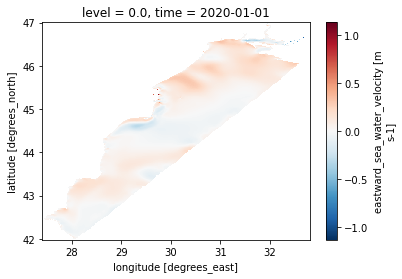

In [7]:
ds_hydro.base_dataset.u_velocity.isel(level=0, time=0).plot()

... or a time series.

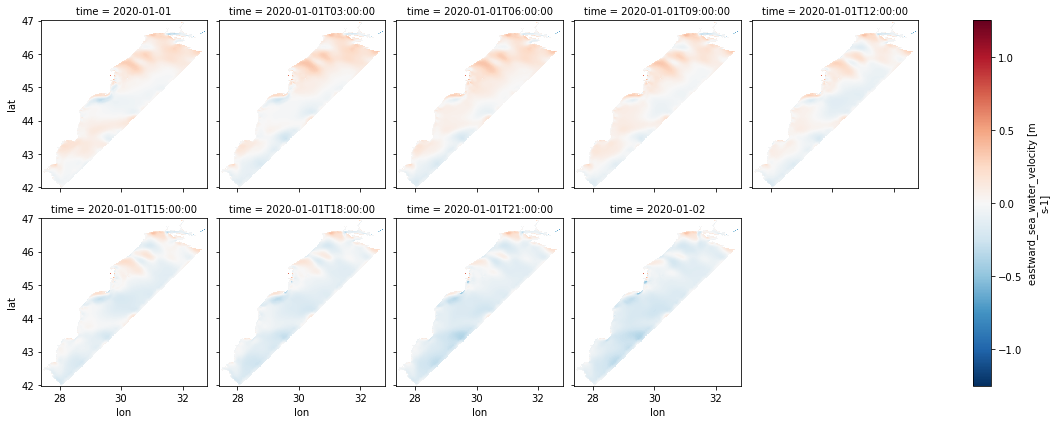

In [8]:
ds_hydro.base_dataset.u_velocity.isel(level=0).plot.imshow(col='time', col_wrap=5)